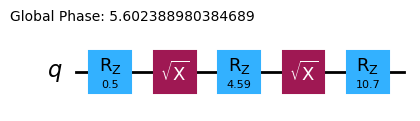

In [36]:
import qiskit

qc = qiskit.QuantumCircuit(1)
qc.u(1.45, 1.28, 0.5, 0)
qc = qiskit.transpile(qc, basis_gates=['rz', 'x', 'sx'])
qc.draw('mpl')


In [23]:
import numpy as np
import scipy.linalg as la
x = np.array([[0, 1], [1, 0]])
sx = la.sqrtm(x)
rx = lambda theta: np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]])
rz = lambda theta: np.array([[np.exp(-1j*theta/2), 0], [0, np.exp(1j*theta/2)]])
print(rz(5*np.pi/2) @ sx @ rz(9*np.pi/8) @ sx @ rz(np.pi/2))

[[-1.66533454e-16+0.98078528j  1.95090322e-01+0.j        ]
 [ 1.95090322e-01+0.j          1.66533454e-16+0.98078528j]]


In [14]:
sx

array([[0.5+0.5j, 0.5-0.5j],
       [0.5-0.5j, 0.5+0.5j]], dtype=complex64)

In [24]:
rx(np.pi/8)

array([[0.98078528+0.j        , 0.        -0.19509032j],
       [0.        -0.19509032j, 0.98078528+0.j        ]])

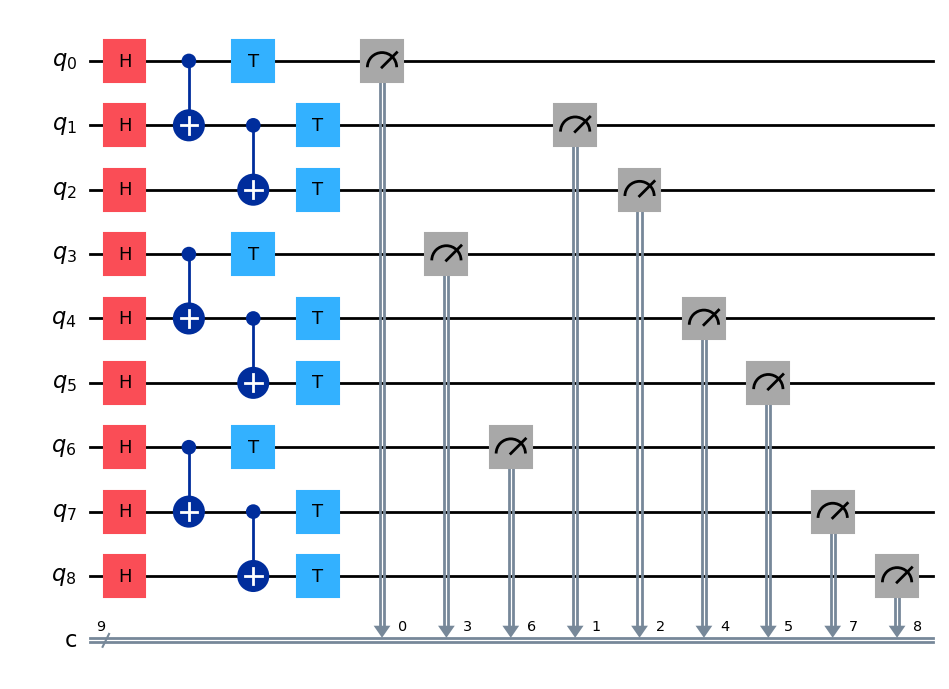

In [40]:
# Tạo mạch lượng tử với 9 qubit (3x3 grid) cho Surface Code
qc = QuantumCircuit(9, 9)

# Bước 1: Khởi tạo qubit dữ liệu và qubit phụ trợ với cổng Hadamard (H)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.h(5)
qc.h(6)
qc.h(7)
qc.h(8)

# Bước 2: Áp dụng cổng CNOT giữa các qubit dữ liệu và qubit phụ trợ
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(3, 4)
qc.cx(4, 5)
qc.cx(6, 7)
qc.cx(7, 8)

# Bước 3: Áp dụng cổng T (near-Clifford) để thay đổi pha
qc.t(0)
qc.t(1)
qc.t(2)
qc.t(3)
qc.t(4)
qc.t(5)
qc.t(6)
qc.t(7)
qc.t(8)

# Bước 4: Đo lường qubit
qc.measure([0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Vẽ mạch lượng tử
qc.draw('mpl')

In [46]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
sx = la.sqrtm(x)
Z = np.array([[1, 0], [0, -1]])

print(sx @ Z @ np.conj(sx).T + Y)

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
